In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
df=pd.read_csv('/content/Salary_Data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## visualization

<Axes: xlabel='YearsExperience', ylabel='Salary'>

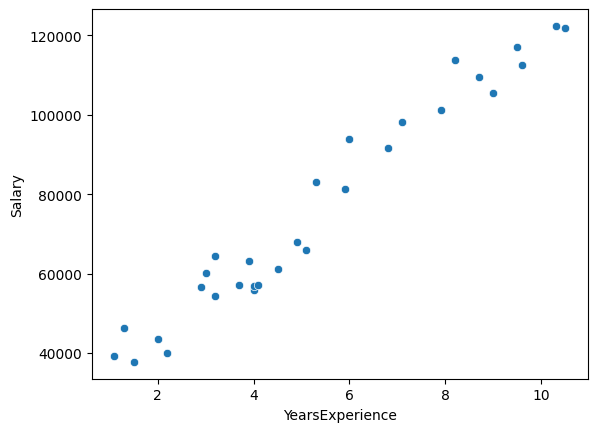

In [10]:
sns.scatterplot(y='Salary',x='YearsExperience',data=df)

<ipython-input-12-6737e57d990c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

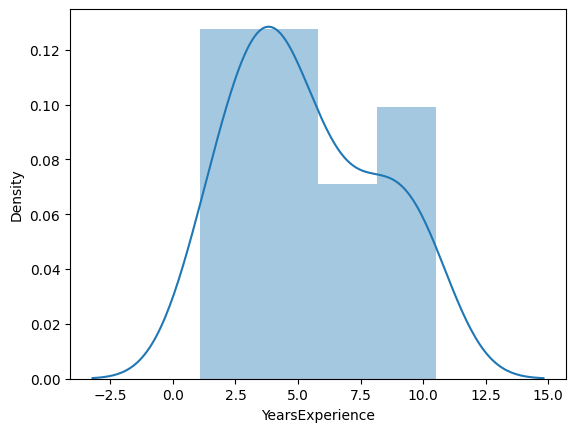

In [12]:
sns.distplot(df['YearsExperience'])

<ipython-input-13-bc20e5e6d548>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

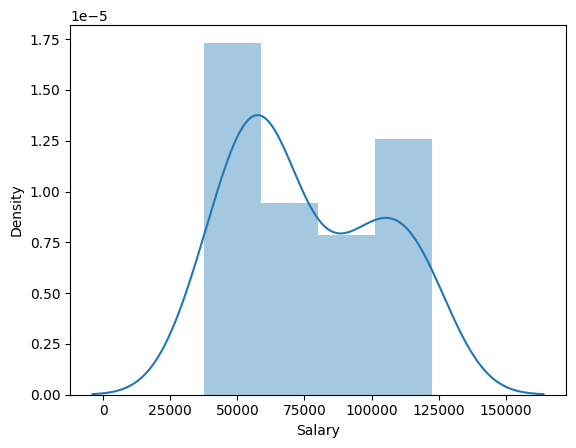

In [13]:
sns.distplot(df['Salary'])

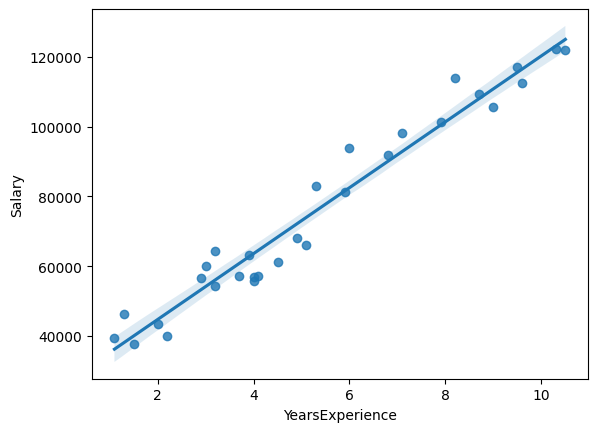

In [15]:
sns.regplot(x="YearsExperience", y="Salary", data=df);

## ols technique

In [18]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        15:20:29   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pred=model.params
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [21]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [22]:
newsalary=pd.Series([30,40])

In [23]:
data_pred=pd.DataFrame(newsalary,columns=['YearsExperience'])
data_pred

,YearsExperience
0,30
1,40


In [24]:
model.predict(data_pred)

0    309291.069842
1    403790.693057
dtype: float64

## log transformation

In [26]:

import statsmodels.formula.api as smf
model2 = smf.ols('Salary~np.log(YearsExperience)',data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           3.25e-13
Time:                        15:22:20   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pred2 = model2.predict(pd.DataFrame(df['YearsExperience']))
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [30]:
pred2
rmse_log = np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred2))**2))
rmse_log

10302.893706228306

In [31]:
pred2.corr(df.Salary)

0.924061081788264

Text(0, 0.5, 'YearsExperience')

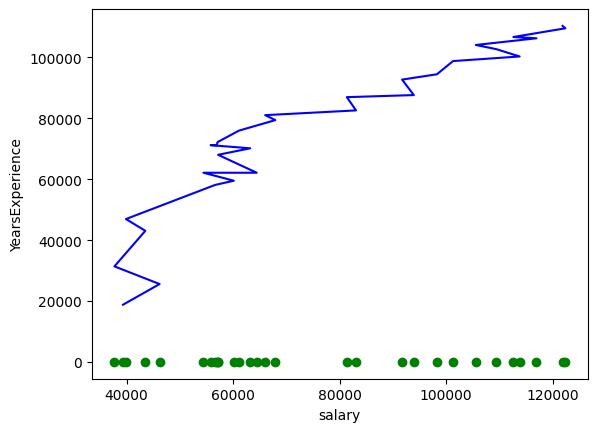

In [39]:
plt.scatter(x=df['Salary'],y=df['YearsExperience'],color='green')
plt.plot(df['Salary'],pred2,color='blue')
plt.xlabel('salary')
plt.ylabel('YearsExperience')

## sqrt transformation

In [41]:
import statsmodels.formula.api as smf
model3 = smf.ols('Salary~np.sqrt(YearsExperience)',data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           8.57e-18
Time:                        15:37:59   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
pred3 = model3.predict(pd.DataFrame(df['YearsExperience']))
pred3

0      27470.511884
1      31262.287009
2      34771.976586
3      42635.056211
4      45499.687794
5      54617.343293
6      55825.518202
7      58182.905200
8      58182.905200
9      63772.383867
10     65901.508208
11     66945.592049
12     66945.592049
13     67976.704394
14     71980.468875
15     75809.903446
16     77665.963118
17     79485.972499
18     84749.033766
19     85599.722290
20     92164.765553
21     94526.218887
22    100589.939171
23    102784.094601
24    106353.652306
25    108446.272632
26    111857.919142
27    112529.386687
28    117134.909368
29    118421.805716
dtype: float64

In [45]:
pred3
rmse_sqrt = np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred2))**2))
rmse_sqrt

10302.893706228306

In [46]:
pred3.corr(df.Salary)

0.9648839072651968

Text(0, 0.5, 'YearsExperience')

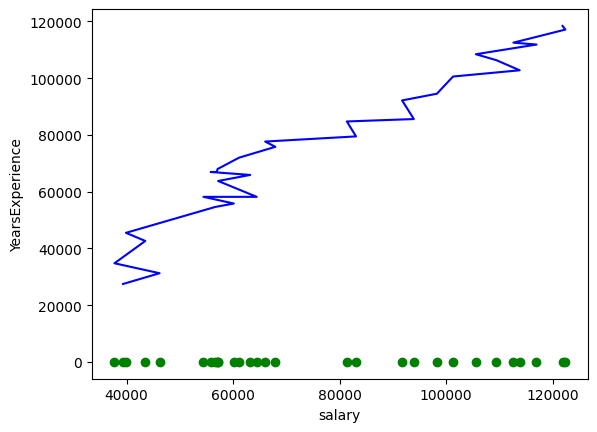

In [50]:
plt.scatter(x=df['Salary'],y=df['YearsExperience'],color='green')
plt.plot(df['Salary'],pred3,color='blue')
plt.xlabel('salary')
plt.ylabel('YearsExperience')